<a href="https://colab.research.google.com/github/jpradeesh3800/ml/blob/master/Text_Classifier_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Make sure that you were familiar with word embeddings before you go through this*

*else visit*

https://github.com/jpradeesh3800/ml/blob/master/Word_Embeddings.ipynb

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install --upgrade pip
!pip install gast==0.2.2
!pip install tensorflow_federated==0.7.0
!pip install -q tf-nightly

import tensorflow as tf

import numpy as np
import os
import time
import tensorflow_datasets as tfds 
tfds.disable_progress_bar()

tf.random.set_seed(1)

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 308 kB 2.7 MB/s 
     |████████████████████████████████| 533.0 MB 16 kB/s 
     |████████████████████████████████| 6.0 MB 21.2 MB/s 
     |████████████████████████████████| 2.8 MB 46.0 MB/s 
     |████████████████████████████████| 454 kB 47.2 MB/s 
     |████████████████████████████████| 775 kB 49.2 MB/s 
ERROR: tensorflow 1.15.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: tb-nightly 2.2.0a20200318 has requirement grpcio>=1.24.3, but you'll have grpcio 1.8.6 which is incompatible.
ERROR: tf-nightly 2.2.0.dev20200318 has requirement h5py<2.11.0,>=2.10.0, but you'll have h5py 2.8.0 which is incompatible.
  Attempting uninstall: gast
  

     |████████████████████████████████| 2.9 MB 2.8 MB/s 


In [0]:
tf.__version__

'2.2.0-dev20200318'

In [0]:
dataset,info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZCCHAR/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZCCHAR/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZCCHAR/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
type(dataset)

dict

In [0]:
dataset

{'test': <DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [0]:
train_data = dataset['train']
test_data = dataset['test']

In [0]:
encoder = info.features['text'].encoder

In [0]:
train_batches = train_data.shuffle(1000).padded_batch(32)
test_batches = test_data.padded_batch(32)

*If we are not using sigmoid or softmax at the output layer,then we will get a value ranging from -inf to +inf*

*Hence, By using from_logits=True , Probability of 0.5 corresponds to a logit of 0. Negative logit correspond to probabilities less than 0.5, positive to > 0.5.*

*Logits also sometimes refer to the element-wise inverse of the sigmoid function.*

In [0]:
model1 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(encoder.vocab_size,32),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(1)
])
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history1 = model1.fit(
    train_batches,
    # validation_split=0.3,
    validation_data=test_batches,
    epochs=10,
          )

Epoch 1/10
782/782 [==============================] - 97s 124ms/step - loss: 0.5437 - accuracy: 0.6989 - val_loss: 0.7032 - val_accuracy: 0.7418
Epoch 2/10
782/782 [==============================] - 98s 125ms/step - loss: 0.4140 - accuracy: 0.8148 - val_loss: 0.4750 - val_accuracy: 0.7708
Epoch 3/10
782/782 [==============================] - 97s 124ms/step - loss: 0.3002 - accuracy: 0.8788 - val_loss: 0.3885 - val_accuracy: 0.8267
Epoch 4/10
782/782 [==============================] - 96s 123ms/step - loss: 0.2657 - accuracy: 0.8948 - val_loss: 0.4130 - val_accuracy: 0.8325
Epoch 5/10
782/782 [==============================] - 101s 129ms/step - loss: 0.3470 - accuracy: 0.8499 - val_loss: 0.5897 - val_accuracy: 0.7824
Epoch 6/10
782/782 [==============================] - 102s 130ms/step - loss: 0.2364 - accuracy: 0.9031 - val_loss: 0.4655 - val_accuracy: 0.8183
Epoch 7/10
782/782 [==============================] - 101s 129ms/step - loss: 0.1769 - accuracy: 0.9330 - val_loss: 0.4862 - val

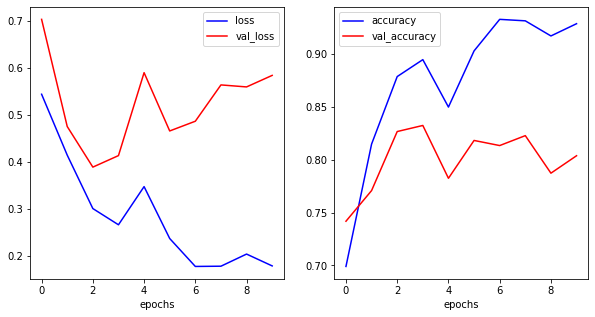

In [0]:
import matplotlib.pyplot as plt
def plot_graph(history):
    hist = history.history
    hist['epochs'] = history.epoch
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(hist['epochs'],hist['loss'],color='b')
    plt.plot(hist['epochs'],hist['val_loss'],color='r')
    plt.legend(['loss','val_loss'])
    plt.xlabel("epochs")

    plt.subplot(1,2,2)
    plt.plot(hist['epochs'],hist['accuracy'],color='b')
    plt.plot(hist['epochs'],hist['val_accuracy'],color='r')
    plt.legend(['accuracy','val_accuracy'])
    plt.xlabel("epochs")

    plt.show()

plot_graph(history1)

In [0]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(encoder.vocab_size,64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dense(1)
])
model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history2 = model2.fit(
    train_batches,
    # validation_split=0.3,
    validation_data=test_batches,
    epochs=10,
          )

Epoch 1/10
782/782 [==============================] - 110s 140ms/step - loss: 0.6366 - accuracy: 0.6051 - val_loss: 0.6838 - val_accuracy: 0.5206
Epoch 2/10
782/782 [==============================] - 111s 141ms/step - loss: 0.6024 - accuracy: 0.6387 - val_loss: 0.5957 - val_accuracy: 0.6574
Epoch 3/10
782/782 [==============================] - 111s 142ms/step - loss: 0.3992 - accuracy: 0.8283 - val_loss: 0.4080 - val_accuracy: 0.8364
Epoch 4/10
782/782 [==============================] - 112s 143ms/step - loss: 0.2726 - accuracy: 0.8891 - val_loss: 0.3627 - val_accuracy: 0.8438
Epoch 5/10
782/782 [==============================] - 112s 143ms/step - loss: 0.2111 - accuracy: 0.9171 - val_loss: 0.3636 - val_accuracy: 0.8643
Epoch 6/10
782/782 [==============================] - 112s 143ms/step - loss: 0.1640 - accuracy: 0.9383 - val_loss: 0.4065 - val_accuracy: 0.8639
Epoch 7/10
782/782 [==============================] - 114s 145ms/step - loss: 0.1157 - accuracy: 0.9594 - val_loss: 0.4393 -

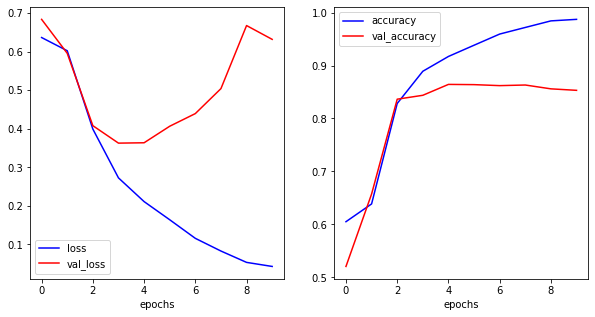

In [0]:
plot_graph(history2)